In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re 
import glob
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

### häufigste Wortfrequenz nach Modalwert

In [51]:
def tokenize(lines, pattern=re.compile(r'\p{L}+')):
    """

    :param lines: object to be tokenized, e.g. file
    :param pattern: pattern to tokenize 'lines'
    :return: lowered and tokenized string
    """
    for line in lines:
        yield from map(str.lower, pattern.findall(line))

# def remove_stopwords(tokens):
#     return (token for token in tokenize(tokens) if token not in set(stopwords.words('german')))


def wordcounts_in_file(file):
    """

    :param file: filename of file to be analyzed
    :return: Counter of tokenized file
    """
    with open(file, encoding='utf-8') as f:
        # return Counter(remove_stopwords(f))
        return Counter(tokenize(f))


def word2freq(counts):
    """

    :param counts: a Counter from a file to be analyzed
    :return: list of each words and their frequencies
    """
    words = []
    freq = []
    for c in counts:
        words.append(c)
        freq.append(counts[c])
    return words, freq


def create_pd_series():
    """

    :param path: path to files
    :param prefix: prefix to remove from filename for further use in Series
    :return: list of pd.Series with words and wordcounts per file
    """
    freq_list = []
    for file in glob.glob(path):
        filename = file.replace(prefix, '')
        counts = wordcounts_in_file(file)
        words, freq = word2freq(counts)
        freq_list.append(pd.Series(freq, words, name=filename))
        print(filename)  # später löschen
    return freq_list


def create_dataframe(series):
    """

    :param series: list of pd.Series, created e.g. with create_pd_series()
    :param mfw: value of most frequent words
    :return: document-term-matrix as pd.Dataframe with zscores
    """
    df = pd.DataFrame(series)
    df = df.fillna(0)

#     df = df.div(df.sum(axis=1), axis=0)

    df.loc['Total_per_word'] = df.sum()
    df = df.sort_values(by='Total_per_word', axis=1, ascending=False)
#     df.drop('Total_per_word', axis=0, inplace=True)
    return df

In [88]:
path = "../corpus/corpus/Angepasst_Größe_groß/gesamt/*.txt"
prefix = "../corpus/corpus/Angepasst_Größe_groß/gesamt/"
freqs = create_pd_series()

Ballade_Wedeking_DerZoologeVonBerlin_lemma.txt
Ballade_DrosteHuelsdorff_DerGeierpfiff_lemma.txt
Lyrik_Hebbel_InDasAlbumEinerEdelnFrau_lemma.txt
Lyrik_Prutz_OBeckerathOBeckerath_lemma.txt
Lyrik_Dehmel_DrueckendeLuft_lemma.txt
Lyrik_Geibel_BeiDerWinterlampeSchimmer_lemma.txt
Lyrik_Storm_Maerz_lemma.txt
Ballade_DrosteHuelsdorff_DerMutterWiederkehr_lemma.txt
Ballade_Fontane_JohannaGray_lemma.txt
Ballade_Wedekind_BrigitteB._lemma.txt
Ballade_DrosteHuelsdorff_DasFraeuleinVonRodenschild_lemma.txt
Lyrik_Meyer_Novembersonne_lemma.txt
Ballade_Liliencron_DieAttacke_lemma.txt
Ballade_Hebbel_DieHeiligeDrei_lemma.txt
Lyrik_Albrecht_Zuruf_lemma.txt
Ballade_Fontane_DerLetzteYork_lemma.txt
Lyrik_Hille_Samenzeit_lemma.txt
Ballade_Goethe_DerGetreueEckart_lemma.txt
Lyrik_Dahn_Fehrbellin_lemma.txt
Ballade_Schwab_Der_Reiter_und_der_Bodensee_lemma.txt
Lyrik_Geiger_LiedDerKnospen_lemma.txt
Ballade_Goethe_DerUntreueKnabe_lemma.txt
Ballade_Weerth_DieHundertMaennerVonHaswell_lemma.txt
Ballade_Fontane_SirWalterRa

In [89]:
fre = create_dataframe(freqs)
fre

,die,und,sein,in,er,ich,eine,es,sie,zu,...,lebenswunde,erleiden,übermacht,weihenacht,weihnachten,donnerkeil,schmieden,nächste,schmiedefeuer,verwandeln
Ballade_Wedeking_DerZoologeVonBerlin_lemma.txt,28.0,3.0,5.0,6.0,6.0,11.0,11.0,5.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_DrosteHuelsdorff_DerGeierpfiff_lemma.txt,131.0,39.0,22.0,20.0,10.0,8.0,23.0,11.0,21.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Hebbel_InDasAlbumEinerEdelnFrau_lemma.txt,10.0,2.0,3.0,4.0,2.0,2.0,0.0,2.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Prutz_OBeckerathOBeckerath_lemma.txt,15.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Dehmel_DrueckendeLuft_lemma.txt,22.0,7.0,1.0,3.0,0.0,5.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lyrik_Prutz_PraktischerRat_lemma.txt,4.0,1.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Goethe_Der_Totentanz_lemma.txt,54.0,17.0,2.0,5.0,13.0,0.0,8.0,7.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Keller_DasGrosseSchillerfest_lemma.txt,71.0,37.0,11.0,12.0,3.0,17.0,14.0,3.0,11.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Rilke_HeilDemGeistDerUnsVerbindenMag_lemma.txt,11.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### most frequent words with and without stopwords by relative frequencies

In [90]:
epik = fre.copy()
epik = epik[epik.index.str.contains('Ballade')]
epik.loc['Summen'] = (epik.sum(axis=0))
epik['Total_per_text'] = epik.sum(axis=1)
epik = epik.sort_values(by='Summen', axis=1, ascending=False)
epik

,Total_per_text,die,und,sein,er,in,eine,ich,sie,es,...,vorgefühl,mädchenhaft,liebekranken,verzückt,duld,tanztaumelnd,erschauern,bucht,julinächte,hinsterben
Ballade_Wedeking_DerZoologeVonBerlin_lemma.txt,282.0,28.0,3.0,5.0,6.0,6.0,11.0,11.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_DrosteHuelsdorff_DerGeierpfiff_lemma.txt,998.0,131.0,39.0,22.0,10.0,20.0,23.0,8.0,21.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_DrosteHuelsdorff_DerMutterWiederkehr_lemma.txt,1412.0,154.0,57.0,32.0,27.0,31.0,21.0,38.0,11.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Fontane_JohannaGray_lemma.txt,634.0,59.0,20.0,21.0,0.0,7.0,9.0,8.0,35.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Wedekind_BrigitteB._lemma.txt,273.0,30.0,6.0,4.0,5.0,2.0,7.0,0.0,14.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ballade_Brentano_AufDemRhein_lemma.txt,435.0,49.0,27.0,10.0,6.0,16.0,6.0,3.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_George_EinEdelkindSahVomBalkon__lemma.txt,89.0,10.0,5.0,1.0,3.0,2.0,2.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Goethe_Der_Totentanz_lemma.txt,362.0,54.0,17.0,2.0,13.0,5.0,8.0,0.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Keller_DasGrosseSchillerfest_lemma.txt,664.0,71.0,37.0,11.0,3.0,12.0,14.0,17.0,11.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
komplett = epik['Total_per_text']['Summen']
epik.drop('Total_per_text', axis=1, inplace=True)
epik = epik.T
epik['rel_sum'] = epik['Summen']/komplett
epik = epik.sort_values(by=['rel_sum'], ascending=False)
#huber = huber[:20]   # uncomment for vis
epik.T

,die,und,sein,er,in,eine,ich,sie,es,zu,...,ruthe,philister,glutverlangen,wolkenfangen,sternepflücken,schadenfroh,niedre,religion,schneeglöckchen,hinsterben
Ballade_Wedeking_DerZoologeVonBerlin_lemma.txt,28.000000,3.000000,5.000000,6.00000,6.000000,11.00000,11.000000,3.000000,5.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_DrosteHuelsdorff_DerGeierpfiff_lemma.txt,131.000000,39.000000,22.000000,10.00000,20.000000,23.00000,8.000000,21.000000,11.000000,9.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_DrosteHuelsdorff_DerMutterWiederkehr_lemma.txt,154.000000,57.000000,32.000000,27.00000,31.000000,21.00000,38.000000,11.000000,15.000000,9.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Fontane_JohannaGray_lemma.txt,59.000000,20.000000,21.000000,0.00000,7.000000,9.00000,8.000000,35.000000,5.000000,8.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Wedekind_BrigitteB._lemma.txt,30.000000,6.000000,4.000000,5.00000,2.000000,7.00000,0.000000,14.000000,4.000000,4.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ballade_George_EinEdelkindSahVomBalkon__lemma.txt,10.000000,5.000000,1.000000,3.00000,2.000000,2.00000,5.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Goethe_Der_Totentanz_lemma.txt,54.000000,17.000000,2.000000,13.00000,5.000000,8.00000,0.000000,6.000000,7.000000,7.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Keller_DasGrosseSchillerfest_lemma.txt,71.000000,37.000000,11.000000,3.00000,12.000000,14.00000,17.000000,11.000000,3.000000,9.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summen,6727.000000,2403.000000,1459.000000,1281.00000,1196.000000,1052.00000,971.000000,894.000000,834.000000,603.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
with open('../scripts/zeta/de_stopwords.txt','r') as f_open:
    stopwords = f_open.read()
#     if x in set(stopwords.words('german')):
ohne_stop_epik = epik.copy().T
for x in ohne_stop_epik:
    if x in stopwords:
        ohne_stop_epik.drop(x, axis=1, inplace=True)
ohne_stop_epik

,stehen,herz,kind,könig,alt,liegen,nacht,auge,hand,rufen,...,ruthe,philister,glutverlangen,wolkenfangen,sternepflücken,schadenfroh,niedre,religion,schneeglöckchen,hinsterben
Ballade_Wedeking_DerZoologeVonBerlin_lemma.txt,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_DrosteHuelsdorff_DerGeierpfiff_lemma.txt,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_DrosteHuelsdorff_DerMutterWiederkehr_lemma.txt,4.000000,2.000000,6.000000,0.000000,3.000000,2.000000,2.000000,5.000000,6.000000,2.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Fontane_JohannaGray_lemma.txt,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,3.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Wedekind_BrigitteB._lemma.txt,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ballade_George_EinEdelkindSahVomBalkon__lemma.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Goethe_Der_Totentanz_lemma.txt,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Keller_DasGrosseSchillerfest_lemma.txt,2.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,3.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summen,128.000000,107.000000,106.000000,103.000000,102.000000,98.000000,97.000000,94.000000,89.000000,87.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
ohne_stop_epik = ohne_stop_epik.T
ohne_stop_epik = ohne_stop_epik.sort_values(by=['rel_sum'],ascending=False)
ohne_stop_epik = ohne_stop_epik[:20]
ohne_stop_epik.T

,stehen,herz,kind,könig,alt,liegen,nacht,auge,hand,rufen,arm,schön,tragen,jung,still,schauen,schwer,licht,schlagen,tief
Ballade_Wedeking_DerZoologeVonBerlin_lemma.txt,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ballade_DrosteHuelsdorff_DerGeierpfiff_lemma.txt,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.00000,1.00000,0.000000,1.000000,0.000000,6.000000,3.000000,1.000000,1.000000,0.000000,0.000000
Ballade_DrosteHuelsdorff_DerMutterWiederkehr_lemma.txt,4.000000,2.000000,6.000000,0.000000,3.000000,2.000000,2.000000,5.000000,6.000000,2.00000,3.00000,0.000000,0.000000,1.000000,3.000000,2.000000,5.000000,0.000000,1.000000,2.000000
Ballade_Fontane_JohannaGray_lemma.txt,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,3.00000,0.00000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
Ballade_Wedekind_BrigitteB._lemma.txt,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ballade_George_EinEdelkindSahVomBalkon__lemma.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ballade_Goethe_Der_Totentanz_lemma.txt,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.00000,2.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
Ballade_Keller_DasGrosseSchillerfest_lemma.txt,2.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,3.00000,1.00000,2.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000
Summen,128.000000,107.000000,106.000000,103.000000,102.000000,98.000000,97.000000,94.000000,89.000000,87.00000,84.00000,83.000000,80.000000,73.000000,72.000000,65.000000,64.000000,64.000000,61.000000,60.000000


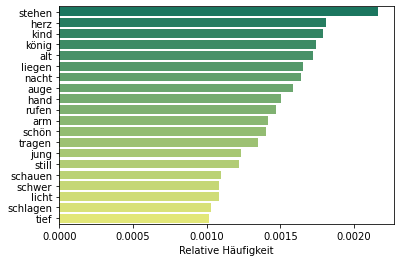

In [24]:
ohne_stop_epik = ohne_stop_epik.T
ax = sns.barplot(x=ohne_stop_epik['rel_sum'], y=ohne_stop_epik.index, data=ohne_stop_epik, palette='summer')
ax.set(xlabel='Relative Häufigkeit')
plt.savefig('../Arbeit/Bilder/MFW_ballade_ohne_stop_ersterKorpus')

In [94]:
lyrik = fre.copy()
lyrik = lyrik[lyrik.index.str.contains('Lyrik')]
lyrik.loc['Summen'] = (lyrik.sum(axis=0))
lyrik['Total_per_text'] = lyrik.sum(axis=1)
lyrik = lyrik.sort_values(by='Summen', axis=1, ascending=False)
lyrik

,Total_per_text,die,und,ich,sein,in,du,eine,zu,es,...,flehend,unschuldig,lügenwort,scherge,gaukelspiel,enttauchen,heisrer,schwimmer,zauberlied,stäbchen
Lyrik_Hebbel_InDasAlbumEinerEdelnFrau_lemma.txt,118.0,10.0,2.0,2.0,3.0,4.0,7.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Prutz_OBeckerathOBeckerath_lemma.txt,105.0,15.0,2.0,0.0,0.0,1.0,3.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Dehmel_DrueckendeLuft_lemma.txt,161.0,22.0,7.0,5.0,1.0,3.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Geibel_BeiDerWinterlampeSchimmer_lemma.txt,90.0,8.0,1.0,5.0,1.0,3.0,0.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Storm_Maerz_lemma.txt,24.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lyrik_Dehmel_Glueck_lemma.txt,31.0,2.0,0.0,0.0,5.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Jerschke_WechselDerWelt_lemma.txt,112.0,16.0,7.0,0.0,3.0,5.0,0.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Prutz_PraktischerRat_lemma.txt,68.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Rilke_HeilDemGeistDerUnsVerbindenMag_lemma.txt,85.0,11.0,3.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
komplett = lyrik['Total_per_text']['Summen']
lyrik.drop('Total_per_text', axis=1, inplace=True)
lyrik = lyrik.T
lyrik['rel_sum'] = lyrik['Summen']/komplett
lyrik = lyrik.sort_values(by=['rel_sum'], ascending=False)
lyrik.T

,die,und,ich,sein,in,du,eine,zu,es,von,...,schelm,drunten,helm,harald,edward,kobes,josef,elefant,drüber,stäbchen
Lyrik_Hebbel_InDasAlbumEinerEdelnFrau_lemma.txt,10.000000,2.000000,2.000000,3.000000,4.000000,7.000000,0.000000,1.000000,2.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Prutz_OBeckerathOBeckerath_lemma.txt,15.000000,2.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Dehmel_DrueckendeLuft_lemma.txt,22.000000,7.000000,5.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Geibel_BeiDerWinterlampeSchimmer_lemma.txt,8.000000,1.000000,5.000000,1.000000,3.000000,0.000000,2.000000,0.000000,3.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Storm_Maerz_lemma.txt,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lyrik_Jerschke_WechselDerWelt_lemma.txt,16.000000,7.000000,0.000000,3.000000,5.000000,0.000000,1.000000,2.000000,3.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Prutz_PraktischerRat_lemma.txt,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Rilke_HeilDemGeistDerUnsVerbindenMag_lemma.txt,11.000000,3.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summen,2055.000000,709.000000,445.000000,419.000000,385.000000,341.000000,278.000000,243.000000,225.000000,202.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
with open('../scripts/zeta/de_stopwords.txt','r') as f_open:
    stopwords = f_open.read()
#     if x in set(stopwords.words('german')):
ohne_stop_lyrik = lyrik.copy().T
for x in ohne_stop_lyrik:
    if x in stopwords:
        ohne_stop_lyrik.drop(x, axis=1, inplace=True)
ohne_stop_lyrik

,herz,seele,lied,nacht,süß,auge,hand,himmel,tief,stehen,...,schelm,drunten,helm,harald,edward,kobes,josef,elefant,drüber,stäbchen
Lyrik_Hebbel_InDasAlbumEinerEdelnFrau_lemma.txt,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Prutz_OBeckerathOBeckerath_lemma.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Dehmel_DrueckendeLuft_lemma.txt,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.00000,2.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Geibel_BeiDerWinterlampeSchimmer_lemma.txt,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Storm_Maerz_lemma.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lyrik_Jerschke_WechselDerWelt_lemma.txt,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Prutz_PraktischerRat_lemma.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Rilke_HeilDemGeistDerUnsVerbindenMag_lemma.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Summen,82.000000,42.000000,37.000000,36.000000,35.000000,31.00000,31.00000,30.000000,28.000000,27.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
ohne_stop_lyrik = ohne_stop_lyrik.T
ohne_stop_lyrik = ohne_stop_lyrik.sort_values(by=['rel_sum'], ascending=False)
ohne_stop_lyrik = ohne_stop_lyrik[:20]

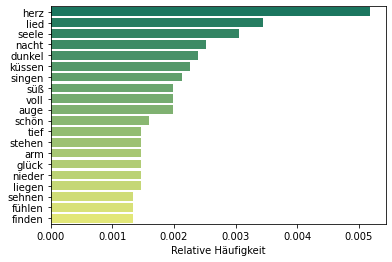

In [32]:
ax = sns.barplot(x=ohne_stop_lyrik['rel_sum'], y=ohne_stop_lyrik.index, data=ohne_stop_lyrik, palette='summer')
ax.set(xlabel='Relative Häufigkeit')
plt.savefig('../Arbeit/Bilder/MFW_lyrik_ohne_stop_ersterKorpus')

[Text(0.5, 0, 'Textlängen')]

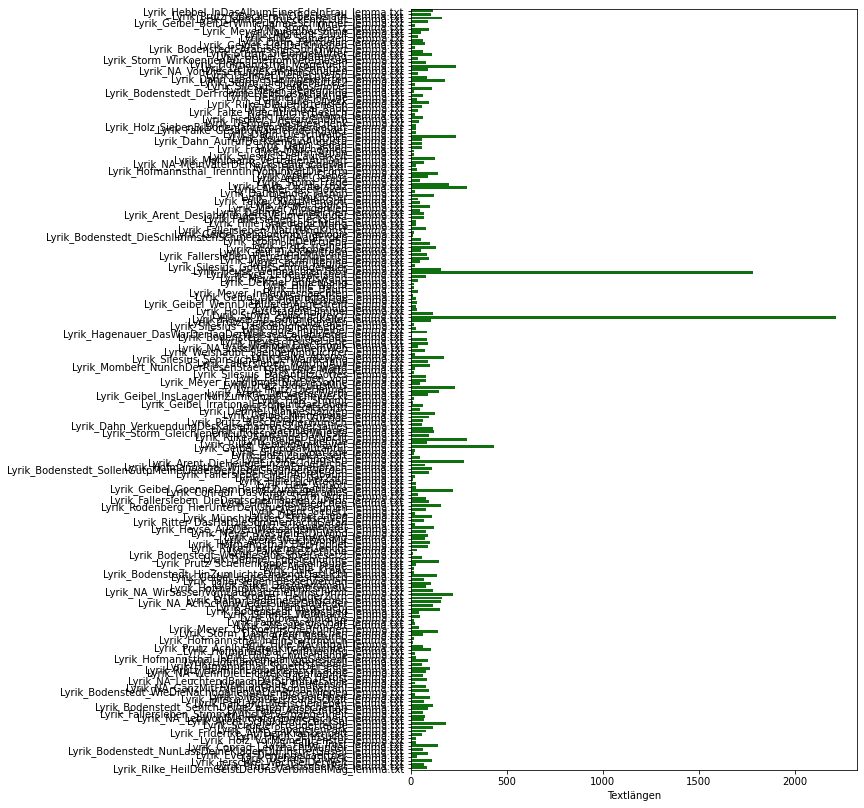

In [87]:
lyrik = fre.copy()
lyrik = lyrik[lyrik.index.str.contains('Lyrik')]
lyrik['Total_per_text'] = lyrik.sum(axis=1)

plt.figure(figsize=(8,14))
ax = sns.barplot(x=lyrik.Total_per_text, y=lyrik.index, data=lyrik, color='g')
ax.set(xlabel='Textlängen')
# plt.savefig('textlängen')

[Text(0.5, 0, 'Textlängen')]

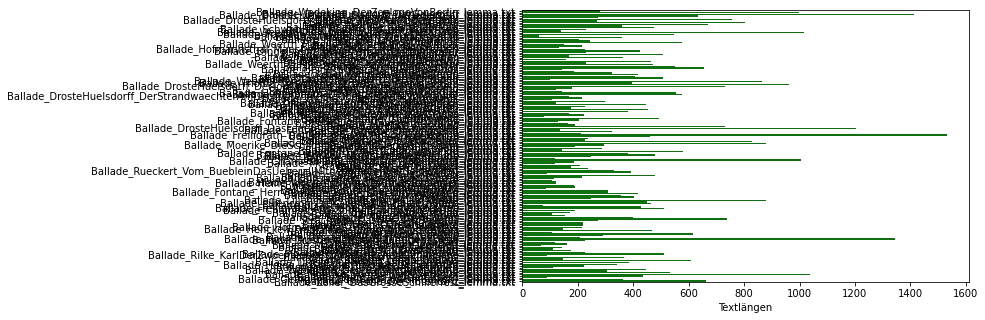

In [88]:
epik = fre.copy()
epik = epik[epik.index.str.contains('Ballade')]
epik['Total_per_text'] = epik.sum(axis=1)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=epik.Total_per_text, y=epik.index, data=epik, color='g')
ax.set(xlabel='Textlängen')
# plt.savefig('textlängen')

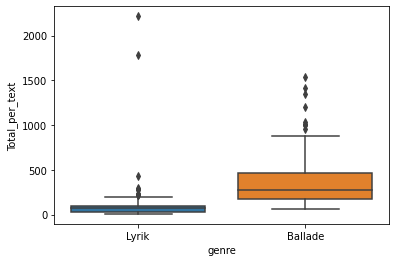

In [89]:
lyrik['genre'] = 'Lyrik'
epik['genre'] = 'Ballade'
alle = pd.concat([lyrik, epik])
sns.boxplot(x=alle.genre, y=alle.Total_per_text)
plt.savefig('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/results/datenexploration/angepasst_groß/boxplot_textlaenge')

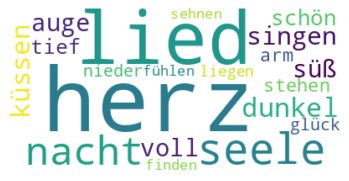

In [35]:
from wordcloud import WordCloud

def makeImage(text, figname):
    wc = WordCloud(background_color="white", max_words=1000)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(figname)
    plt.show()

text = ohne_stop_lyrik['rel_sum']
# text = abba.any()
makeImage(text, "../Arbeit/Bilder/wordcloud_lyrik_ersterKorpus")

In [36]:
ax = sns.distplot(m['rel_sum'], hist=False, label="Ballade")
ax = sns.distplot(f['rel_sum'], hist=False, label="Lyrik")
ax.set_xlabel("wordfrequency")
ax.set_ylabel("occurence")
plt.title("Distribution of Wordfrequencies")
plt.savefig("distribution_wordfrequencies")
plt.legend()

NameError: name 'm' is not defined

### compare delta values for texts by same and different authors

In [155]:
def same_dif(delta):
    ax = sns.distplot(delta['cosine'][delta['label']=='different'], hist=False, label='different', color=(0.2, 0.3, 0.1))
    ax = sns.distplot(delta['cosine'][delta['label']=='same'], hist=False, label='same', color='g')
    ax.set(ylabel='Count')

    # Get the two lines from the axes to generate shading
    l1 = ax.lines[0]
    l2 = ax.lines[1]

    # Get the xy data from the lines so that we can shade
    x1, y1 = l1.get_xydata().T
    x2, y2 = l2.get_xydata().T

    xmin = max(x1.min(), x2.min())
    xmax = min(x1.max(), x2.max())
    x = np.linspace(xmin, xmax, 100)
    y1 = np.interp(x, x1, y1)
    y2 = np.interp(x, x2, y2)
    y = np.minimum(y1, y2)
    ax.fill_between(x, y, color="grey", alpha = 0.3, hatch = '|')
    
    # uncomment to add cutoff border
#     cut = cutoff[cutoff['corpus']==corpus]['delta']
#     plt.axvline(float(cut), 0, 1) 
#     plt.savefig(mfw + '_' + corpus + '_' + 'same_different_cutoff')

    
    plt.savefig(mfw + '_' + corpus + '_' + 'same_different_deltas')
    plt.legend()
    plt.show()

In [30]:
path = "/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/results/delta/*.h5"
prefix = "/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/results/delta/"
for file in glob.glob(path):
    delta = pd.read_hdf(file)
    delta = delta[delta.cosine!=1.00]
    mfw = file.replace(prefix, "").split('_')[0]
    corpus = file.replace(prefix, "").replace('.h5','').split('_')[0]
    same_dif(delta)
#     if mfw == '1000':
#         same_dif(delta)


NameError: name 'same_dif' is not defined

In [ ]:
path = "project_stylometry_statistics/results/Chinese/delta/*.h5"
prefix = "project_stylometry_statistics/results/Chinese/delta/"
for file in glob.glob(path):
    delta = pd.read_hdf(file)
    delta = delta[delta.cosine!=1.00]
    mfw = file.replace(prefix, "").split('_')[0]
    corpus = file.replace(prefix, "").replace('.h5','').split('_')[2]
    same_dif(delta)
#     if mfw == '1000':
#         same_dif(delta)


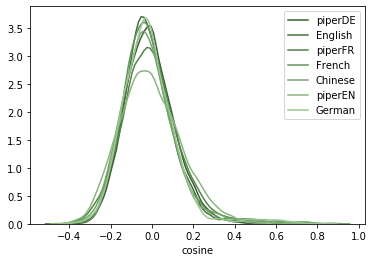

In [63]:
path = 'results/1000/*.h5'
prefix = 'results/1000'
for file in glob.glob(path):
    language = pd.read_hdf(file)
    language = language[language.cosine!=1.00]
    corp = file.replace('.h5', '').split('_')[2]
    sns.set_palette(sns.cubehelix_palette(7, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
    ax = sns.distplot(language['cosine'], hist=False, label=corp)
    plt.legend()
plt.savefig('delta_normaldist_1000mfw')

### Delta variance per corpus

In [86]:
var = pd.read_hdf("project_stylometry_statistics/results/Chinese/delta/1000_delta_Chinese.h5")
v = var.copy()
v['corpus'] = 'Chinese'
v = v.drop('manhattan', axis=1)
v = v.drop('euclidean', axis=1)
v = v.drop('label', axis=1)
v = v.drop('author', axis=1)
v = v.reset_index()
v = v.drop('index', axis=1)
v

,manhattan,cosine,euclidean,label,author
"BiShuMin,HuaGuanBingDu,seg.txt",0.00,0.00,0.00,same,BiShuMin
"BiShuMin,LanSeTianTang,seg.txt",589.27,0.49,30.22,same,BiShuMin
"YvQiuyv,ShuangLengChangHe,seg.txt",751.50,0.73,36.28,different,YvQiuyv
"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",751.84,0.80,36.84,different,LongYingtai
"YvQiuyv,XingZheWuJiang,seg.txt",758.32,0.76,36.53,different,YvQiuyv
...,...,...,...,...,...
"ZhouRuchang,HongLouShiErCeng,seg.txt",1049.81,1.11,49.20,different,ZhouRuchang
"ZhouGuoping,ShouWangDeJuLi,seg.txt",1050.02,1.13,48.56,different,ZhouGuoping
"ZhouRuchang,HongLouBieYangHong,seg.txt",1057.65,1.10,48.87,different,ZhouRuchang
"ZhouGuoping,LingHunZhiNengDuXing,seg.txt",1066.59,1.13,48.77,different,ZhouGuoping


In [58]:
#variance = pd.DataFrame()
variance = pd.concat([variance, v])
variance = variance[variance['cosine']!=0.00]
variance

,cosine,corpus
1,0.60,piperDE
2,0.75,piperDE
3,0.71,piperDE
4,0.75,piperDE
5,0.78,piperDE
...,...,...
5620,1.11,Chinese
5621,1.13,Chinese
5622,1.10,Chinese
5623,1.13,Chinese


In [9]:
import pandas as pd 
vdelta = pd.read_csv("delta_varianz_allekorpora")
vdelta = vdelta[vdelta.cosine!=1.00]
vdelta.sort_values(by=['corpus'], inplace=True)
vdelta

,Unnamed: 0,cosine,corpus
1,"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
3755,"YanGelin,LvXie,seg.txt",0.09,Chinese
3754,"YanGelin,LuFanYanShi,seg.txt",0.10,Chinese
3753,"JiaPingwa,QinQiang,seg.txt",0.32,Chinese
3752,"ChenZhongshi,ChuXia,seg.txt",0.40,Chinese
...,...,...,...
37703,"Cladel,Leon_OMPDRAILLES_Novel.txt",-0.03,pipierFR
37704,"Zola,Emile_LeventredeParis_Novel.txt",-0.07,pipierFR
37705,"Charriere,IsabelleDe_CalisteOuLettresDeLausann...",0.12,pipierFR
37641,"Dumas,Alexandre_OlympesDesCleves_Novel.txt",-0.01,pipierFR


In [10]:
cutoff = pd.read_csv("entire_best_cutoff.csv")
cutoff.sort_values(by=['corpus'], inplace=True)
cutoff                   

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500


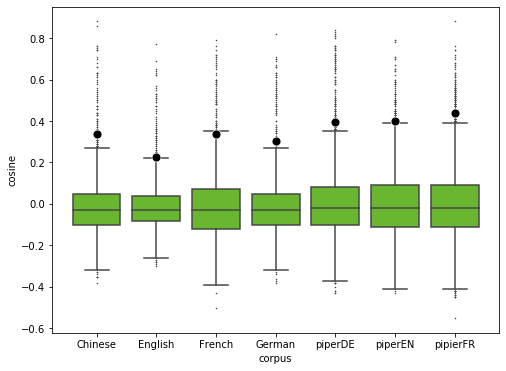

In [14]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='corpus', y='cosine', data=vdelta, color=(0.4, 0.8, 0.1), fliersize=0.5)
ax = sns.scatterplot(x='corpus', y='delta', data=cutoff, color='black', s=80, zorder=10)
plt.ylabel('cosine')
plt.savefig("deltastreuung_plus_deltacutoff")

### Delta normal distribution

In [69]:
cutoff

,Unnamed: 0,Unnamed: 0.1,fp,fn,percentage,delta,corpus,mfw
0,18,67,0.003311,0.005459,0.68,0.3996,piperEN,1000
1,10,64,0.004324,0.009730,0.65,0.3385,French,500
2,6,48,0.002883,0.003964,0.49,0.2243,English,2000
3,18,68,0.004592,0.005828,0.69,0.4367,piperFR,500
4,26,56,0.002883,0.003964,0.57,0.3040,German,1000
5,15,56,0.005766,0.003964,0.57,0.3382,Chinese,1000
6,4,64,0.002416,0.002953,0.65,0.3955,piperDE,500


In [9]:
cos = pd.read_hdf("../results/German/delta/1000_delta_German.h5")
cos = cos[cos.cosine!=1.00]

In [10]:
plus_same = np.mean(cos[cos['label']=='same']['cosine']) + np.std(cos[cos['label']=='same']['cosine'])
minus_same = np.mean(cos[cos['label']=='same']['cosine']) - np.std(cos[cos['label']=='same']['cosine'])

plus_diff = np.mean(cos[cos['label']=='different']['cosine']) + np.std(cos[cos['label']=='different']['cosine'])
minus_diff = np.mean(cos[cos['label']=='different']['cosine']) - np.std(cos[cos['label']=='different']['cosine'])

print(plus_same, minus_same, plus_diff, minus_diff)

0.6191277293757895 0.33281671506865484 0.08468876630119851 -0.13606131532080637


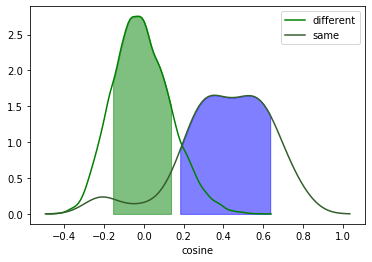

In [124]:
path = "project_stylometry_statistics/results/piperEN/delta/1000_delta_piperEN.h5"
prefix = "project_stylometry_statistics/results/piperEN/delta/"
corpus = 'piperEN'
def distplot(dist):
    ax = sns.distplot(dist['cosine'], hist=False, color='green')
    plt.savefig(mfw + '_' + corpus + '_delta_normaldist')
    plt.show()
    
import re
from scipy import stats


numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

        
        
for file in sorted(glob.glob(path), key=numericalSort):
    dist = pd.read_hdf(file)
    mfw = file.replace(prefix,'').split('_')[0]
    dist = dist[dist['cosine']!=1.00]

    #distplot(dist)
    #sns.set_palette("summer")
    sns.set_palette(sns.cubehelix_palette(14, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
#     ax = sns.distplot(dist['cosine'], hist=False, label=mfw)    #visualise all mfw steps

    #visualise same and different curve for one mfw step with quartile
    ax = sns.distplot(dist[dist['label']=='different']['cosine'], hist=False, label='different', color='g')
    kde = stats.gaussian_kde(dist[dist['label']=='different']['cosine'])
    shade = np.linspace(minus_diff, plus_diff, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='green')
    
    ax = sns.distplot(dist[dist['label']=='same']['cosine'], hist=False, label='same')
    kde = stats.gaussian_kde(dist[dist['label']=='same']['cosine'])
    shade = np.linspace(minus_same, plus_same, 300)
    plt.fill_between(shade, kde(shade), alpha=0.5, color='blue')
    
    
    plt.legend()
plt.savefig(corpus + '_delta_normaldist_quartile_MFW1000')

In [66]:
cutoff = pd.read_csv("project_stylometry_statistics/entire_best_cutoff.csv")

In [21]:
#vdelta = pd.DataFrame()
deltas = pd.read_hdf("project_stylometry_statistics/results/piperDE/delta/500_delta_piperDE.h5")
deltas.drop('manhattan', axis=1, inplace=True)
deltas.drop('euclidean', axis=1, inplace=True)
deltas.drop('label', axis=1, inplace=True)
deltas.drop('author', axis=1, inplace=True)
deltas['corpus']='piperDE'
vdelta=pd.concat([vdelta, deltas])
vdelta

,cosine,corpus
"BiShuMin,HuaGuanBingDu,seg.txt",1.00,Chinese
"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
...,...,...
"Ehrmann,Marianne_Amalie.EinewahreGeschichteinBriefen_Novel.txt",-0.35,piperDE
"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [35]:
vdelta.to_csv("delta_varianz_allekorpora")

In [41]:
vdelta = pd.read_csv("delta_varianz_allekorpora")
vdelta = vdelta[vdelta.cosine!=1.00]
vdelta

,Unnamed: 0,cosine,corpus
1,"BiShuMin,LanSeTianTang,seg.txt",0.51,Chinese
2,"YvQiuyv,ShuangLengChangHe,seg.txt",0.27,Chinese
3,"LongYingtai,ZheGeDongDangDeShiJie,seg.txt",0.20,Chinese
4,"YvQiuyv,XingZheWuJiang,seg.txt",0.24,Chinese
5,"YvQiuyv,WenHuaKuLv,seg.txt",0.13,Chinese
...,...,...,...
90296,"Ehrmann,Marianne_Amalie.EinewahreGeschichteinB...",-0.35,piperDE
90297,"Fischer,CarolineAuguste_Margarethe_Novel.txt",-0.34,piperDE
90298,"Reventlow,Franziska_VonPaulzuPedro_Novel.txt",-0.23,piperDE
90299,"Fischer,CarolineAuguste_DieHonigmonathe_Novel.txt",-0.37,piperDE


In [64]:
german = vdelta[vdelta['corpus']=='German']
chinese = vdelta[vdelta['corpus']=='Chinese']
french = vdelta[vdelta['corpus']=='French']
english = vdelta[vdelta['corpus']=='English']
piperDE = vdelta[vdelta['corpus']=='piperDE']
piperFR = vdelta[vdelta['corpus']=='pipierFR']
piperFR.corpus='piperFR'
piperEN = vdelta[vdelta['corpus']=='piperEN']
liste = [german, chinese, french, english, piperDE, piperEN, piperFR]

/home/teresa/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


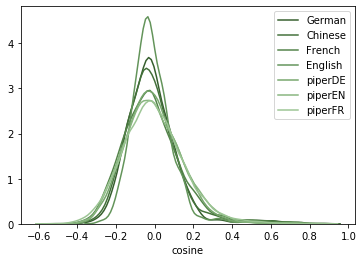

In [65]:
for language in liste:
    corp = np.unique(language['corpus'])[0]
    sns.set_palette(sns.cubehelix_palette(7, start=1.85, rot=0, dark=0.3, light=.7, reverse=True))
    ax = sns.distplot(language['cosine'], hist=False, label=corp)
    plt.legend()
plt.savefig('_delta_normaldist_best_cutoffs')

#### PCA

In [98]:
mfw = fre.iloc[:,:1000]
mfw

,die,und,sein,in,er,ich,eine,es,sie,zu,...,droben,gem,bereit,geschick,staub,erschallen,zuckend,hut,merken,dolch
Ballade_Wedeking_DerZoologeVonBerlin_lemma.txt,28.0,3.0,5.0,6.0,6.0,11.0,11.0,5.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Ballade_DrosteHuelsdorff_DerGeierpfiff_lemma.txt,131.0,39.0,22.0,20.0,10.0,8.0,23.0,11.0,21.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Hebbel_InDasAlbumEinerEdelnFrau_lemma.txt,10.0,2.0,3.0,4.0,2.0,2.0,0.0,2.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Prutz_OBeckerathOBeckerath_lemma.txt,15.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lyrik_Dehmel_DrueckendeLuft_lemma.txt,22.0,7.0,1.0,3.0,0.0,5.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lyrik_Prutz_PraktischerRat_lemma.txt,4.0,1.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Goethe_Der_Totentanz_lemma.txt,54.0,17.0,2.0,5.0,13.0,0.0,8.0,7.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballade_Keller_DasGrosseSchillerfest_lemma.txt,71.0,37.0,11.0,12.0,3.0,17.0,14.0,3.0,11.0,9.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Lyrik_Rilke_HeilDemGeistDerUnsVerbindenMag_lemma.txt,11.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Prosa nur lemmatisierter Text

In [99]:
path = '../corpus/corpus/Angepasst_Größe_groß/gesamt/*.txt'
prefix = '../corpus/corpus/Angepasst_Größe_groß/gesamt/'
    
text_list = []
for file in glob.glob(path):
    filename = file.replace(prefix, '').replace('.txt', '')
    with open(file, 'r') as f:
        data = f.read().replace('\n', ' ')        
    text_list.append(pd.Series(data, name=filename))

prosa = pd.DataFrame(text_list)
prosa['mfw'] = '0'
prosa['sprechmarker'] = '0'
prosa['emotionen'] = '0'
prosa.head()

,0,mfw,sprechmarker,emotionen
Ballade_Wedeking_DerZoologeVonBerlin_lemma,die zoologe von berlin hören ihr kind wie es...,0,0,0
Ballade_DrosteHuelsdorff_DerGeierpfiff_lemma,die geierpfiff » nun still du an die dohne...,0,0,0
Lyrik_Hebbel_InDasAlbumEinerEdelnFrau_lemma,in dein seele unbeflecktem adel in ihr unsch...,0,0,0
Lyrik_Prutz_OBeckerathOBeckerath_lemma,@ord@ berlin september @card@ o beckerath ...,0,0,0
Lyrik_Dehmel_DrueckendeLuft_lemma,die himmel dunkeln noch immer ich fühlen tie...,0,0,0


Prosa mit 1000 MFW, Sprechmarkern und Emotionen

In [100]:
for i, row in prosa.iterrows():
    string = ''
    for m in mfw.columns:
        if m in row[0]:
            string += m
            string += ' '
    row.mfw = string

In [101]:
sprechmarker = ['sagen', 'sprechen', 'fragen', 'antworten', 'schreien', 'jammern']

for i, row in prosa.iterrows():
    string = ''
    for m in sprechmarker:
        if m in row[0]:
            string += m
            string += ' '
    row.sprechmarker = string

In [102]:
emotion = ['liebreich','angst', 'ängstlich', 'trauer', 'traurig', 'zornig', 'zorn', 'verachtungsvoll', 'verachtung',
           'schuld', 'schuldig', 'liebe',  'geliebt', 'liebevoll', 'stolz', 'scham', 'schämen', 'überrasschung',
           'überrascht', 'sorge', 'sorgenvoll', 'ekel', 'ekeln', 'angeekelt', 'neid', 'neidisch', 'neidvoll',
           'glücklich', 'glück', 'freude', 'freudig', 'freuen', 'erleichterung', 'erleichtert', 'vergnügt', 'vergnügen',
           'zufrieden', 'zufriedenheit', 'verzweiflung', 'verzweifelt', 'verlegenheit', 'verlegen', 'aufregung',
           'aufgeregt', 'aufregen', 'spannung', 'gespannt', 'erregung', 'erregt', 'hoffen', 'hoffnung', 'befriedigt',
           'langweilig', 'langeweile', 'mitgefühl', 'mitfühlen', 'enttäuscht', 'enttäuschung', 'frust', 'frustriert',
           'eifersucht', 'eifersüchtig', 'wut', 'wütend', 'reue', 'schock', 'schockiert', 'zuneigung', 'verärgert',
           'verärgerung', 'erwartungsvoll', 'erwartung', 'vorfreude', 'scheu', 'gelassen', 'gelassenheit', 'mut',
           'mutig', 'neugierde', 'neugierig', 'depression', 'depressiv', 'niedergeschlagenheit', 'niedergeschlagen',
           'lustvoll', 'lust', 'rausch', 'einfühlend', 'einfühlsam', 'euphorisch', 'euphorie', 'dankbarkeit', 'dankbar',
           'hass', 'entsetzt', 'entsetzen', 'demütigung', 'demütig', 'demut', 'interesse', 'interessiert', 'einsamkeit',
           'einsam', 'empörung', 'empört', 'vertrauen', 'qualvoll', 'qual', 'gleichgültigkeit', 'gleichgültig',
           'fröhlichkeit', 'fröhlich', 'schadenfroh', 'schadenfreude', 'schmerz', 'melancholie', 'melancholisch',
           'panik', 'panisch']

for i, row in prosa.iterrows():
    string = ''
    for m in emotion:
        if m in row[0]:
            string += m
            string += ' '
    row.emotionen = string

In [103]:
prosa['genre'] = '0'
prosa['titel'] = '0'

for i, row in prosa.iterrows():
    row['genre'] = i.split("_")[0]
    row['titel'] = i.split("_")[:]
prosa = prosa.rename(columns={0: "text"})
prosa.head()

,text,mfw,sprechmarker,emotionen,genre,titel
Ballade_Wedeking_DerZoologeVonBerlin_lemma,die zoologe von berlin hören ihr kind wie es...,die und sein in er ich eine es sie zu du von a...,sagen sprechen,schuld schuldig freuen reue,Ballade,"[Ballade, Wedeking, DerZoologeVonBerlin, lemma]"
Ballade_DrosteHuelsdorff_DerGeierpfiff_lemma,die geierpfiff » nun still du an die dohne...,die und sein in er ich eine es sie zu du von a...,sprechen schreien,stolz freuen reue scheu mut rausch einsam fröh...,Ballade,"[Ballade, DrosteHuelsdorff, DerGeierpfiff, lemma]"
Lyrik_Hebbel_InDasAlbumEinerEdelnFrau_lemma,in dein seele unbeflecktem adel in ihr unsch...,die und sein in er ich eine es sie zu du von a...,sagen,schuld,Lyrik,"[Lyrik, Hebbel, InDasAlbumEinerEdelnFrau, lemma]"
Lyrik_Prutz_OBeckerathOBeckerath_lemma,@ord@ berlin september @card@ o beckerath ...,die und in er ich es zu du an wie sich mit ihr...,,mut schmerz,Lyrik,"[Lyrik, Prutz, OBeckerathOBeckerath, lemma]"
Lyrik_Dehmel_DrueckendeLuft_lemma,die himmel dunkeln noch immer ich fühlen tie...,die und sein in er ich eine es sie du von an w...,,trauer liebe,Lyrik,"[Lyrik, Dehmel, DrueckendeLuft, lemma]"


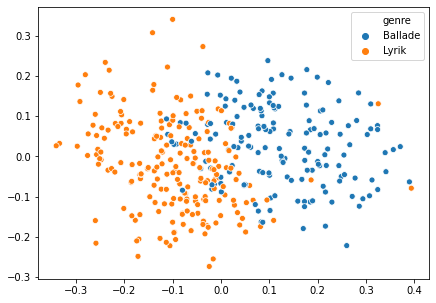

In [104]:
x = TfidfVectorizer().fit_transform(prosa.mfw)
X = TruncatedSVD(n_components=50, random_state=0).fit_transform(x)
pca = PCA(n_components=2)
X_tf = pca.fit_transform(X)
plt.figure(figsize=(7,5))
sns.scatterplot(X_tf[:, 0], X_tf[:, 1],hue=prosa.genre, marker="o")

plt.savefig('../Arbeit/Bilder/PCA_genres_angepasstGroß.png', bbox_inches = "tight")

In [108]:
for i,row in prosa.iterrows():
    c = Counter(row.text.split())
    prosa.at[i, 'number_of_tokens'] = sum(c.values())
    prosa.at[i, 'number_of_types'] = int(len(c))
prosa

,text,mfw,sprechmarker,emotionen,genre,titel,number_of_tokens,number_of_types
Ballade_Wedeking_DerZoologeVonBerlin_lemma,die zoologe von berlin hören ihr kind wie es...,die und sein in er ich eine es sie zu du von a...,sagen sprechen,schuld schuldig freuen reue,Ballade,"[Ballade, Wedeking, DerZoologeVonBerlin, lemma]",281.0,156.0
Ballade_DrosteHuelsdorff_DerGeierpfiff_lemma,die geierpfiff » nun still du an die dohne...,die und sein in er ich eine es sie zu du von a...,sprechen schreien,stolz freuen reue scheu mut rausch einsam fröh...,Ballade,"[Ballade, DrosteHuelsdorff, DerGeierpfiff, lemma]",987.0,446.0
Lyrik_Hebbel_InDasAlbumEinerEdelnFrau_lemma,in dein seele unbeflecktem adel in ihr unsch...,die und sein in er ich eine es sie zu du von a...,sagen,schuld,Lyrik,"[Lyrik, Hebbel, InDasAlbumEinerEdelnFrau, lemma]",119.0,81.0
Lyrik_Prutz_OBeckerathOBeckerath_lemma,berlin september o beckerath o beckerath...,die und in er ich es zu du an wie sich mit ihr...,,mut schmerz,Lyrik,"[Lyrik, Prutz, OBeckerathOBeckerath, lemma]",101.0,56.0
Lyrik_Dehmel_DrueckendeLuft_lemma,die himmel dunkeln noch immer ich fühlen tie...,die und sein in er ich eine es sie du von an w...,,trauer liebe,Lyrik,"[Lyrik, Dehmel, DrueckendeLuft, lemma]",160.0,103.0
...,...,...,...,...,...,...,...,...
Lyrik_Jerschke_WechselDerWelt_lemma,die welt sein nimmer bleiben die herrlich welt...,die und sein in er ich eine es sie zu du nicht...,,,Lyrik,"[Lyrik, Jerschke, WechselDerWelt, lemma]",109.0,77.0
Lyrik_Prutz_PraktischerRat_lemma,praktisch rat dies ew'gen pinselei dies rede...,die und sein in er ich es zu an wie mit ihr ni...,,,Lyrik,"[Lyrik, Prutz, PraktischerRat, lemma]",65.0,47.0
Ballade_Goethe_Der_Totentanz_lemma,die totentanz die türmer die schauen zumitte...,die und sein in er ich eine es sie zu du von a...,,scham glück reue,Ballade,"[Ballade, Goethe, Der, Totentanz, lemma]",348.0,188.0
Ballade_Keller_DasGrosseSchillerfest_lemma,die groß schillerfest schnee und regen fließe...,die und sein in er ich eine es sie zu du von a...,sagen sprechen,traurig freude hoffnung scheu mut lust rausch,Ballade,"[Ballade, Keller, DasGrosseSchillerfest, lemma]",662.0,364.0


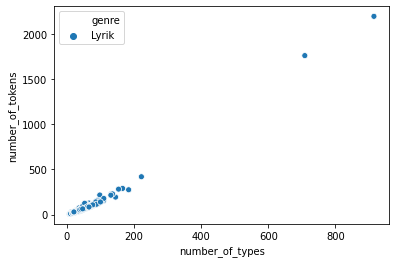

In [101]:
# plt.figure(figsize=(12,8))
sns.scatterplot(x='number_of_types', y='number_of_tokens',hue='genre', data=prosa[prosa.genre=='Lyrik'])
plt.savefig('/home/piah/Dokumente/Uni/Projektarbeit/Projektarbeit_LyrikGattungszuweisung/corpus/results/datenexploration/angepasst_groß/type_token_ratio_Lyrik')